<a href="https://colab.research.google.com/github/GuevaraMarcos/ChallengeTiendas/blob/main/ChallengeTiendasAlura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}


#1. Análisis de facturación



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

ingresosTienda = {}

for nombre, totalf in tiendas.items():
    totalf['Precio'] = pd.to_numeric(totalf['Precio'])  # Asegura que los precios sean numéricos
    TotalFac = sum(totalf['Precio'])  # Suma total de la columna 'Precio'
    print(f"El total de facturación en la {nombre} es de {TotalFac:,.2f} pesos.")
    ingresosTienda[nombre] = TotalFac


El total de facturación en la Tienda 1 es de 1,150,880,400.00 pesos.
El total de facturación en la Tienda 2 es de 1,116,343,500.00 pesos.
El total de facturación en la Tienda 3 es de 1,098,019,600.00 pesos.
El total de facturación en la Tienda 4 es de 1,038,375,700.00 pesos.


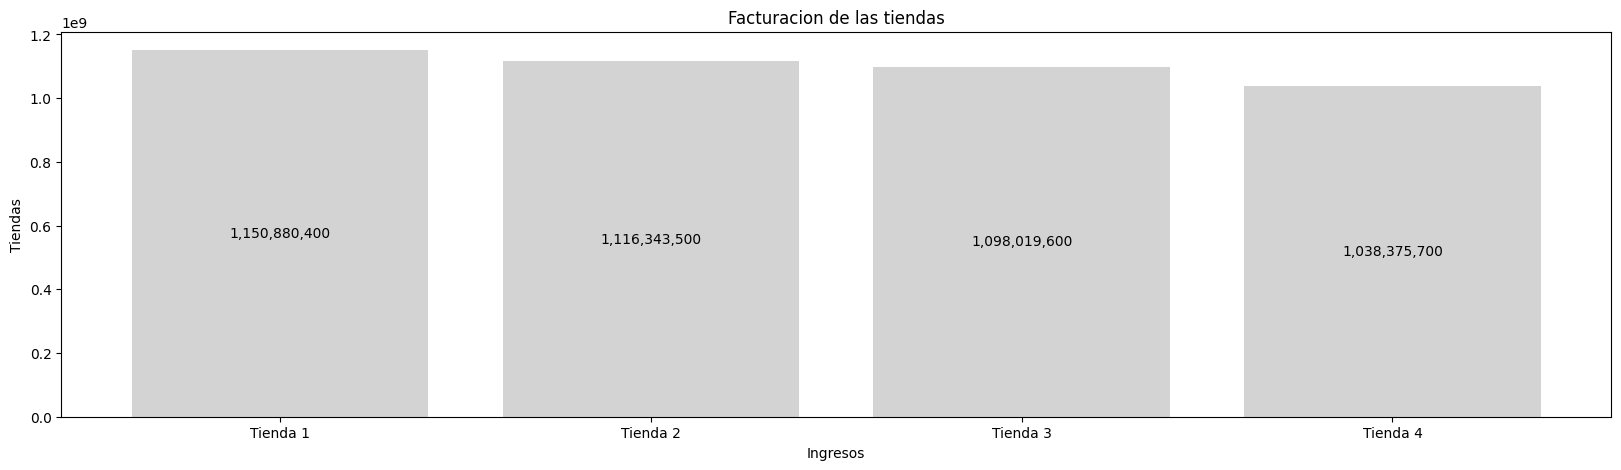

In [ ]:
import matplotlib.pyplot as plt

def VisualizacionIngresos():
  nombreTienda = list(ingresosTienda.keys())
  ingresoTotal = list(ingresosTienda.values())

  plt.figure(figsize=(20, 5))
  graf = plt.bar(nombreTienda, ingresoTotal)

  plt.title('Facturacion de las tiendas')
  plt.xlabel('Ingresos')
  plt.ylabel('Tiendas')

  plt.bar(nombreTienda, ingresoTotal, color='lightgray')


  plt.bar_label(graf, labels=[f'{v:,.0f}' for v in ingresoTotal], label_type = 'center')
  plt.show()

VisualizacionIngresos()

# 2. Ventas por categoría

In [ ]:
ventasPorCategoria = {}

for nombre, df in tiendas.items():
    if 'Categoría del Producto' in df.columns:
      ventasPorCategoria[nombre] = df['Categoría del Producto'].value_counts()

print("Ventas por Categoría:")
for nombre, ventas in ventasPorCategoria.items():
    print(f"\n{nombre}:")
    print(ventas.to_string())

Ventas por Categoría:

Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171

Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181

Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177

Tienda 4:
Categoría del Producto
Muebles                    480
Electrónicos               451
Juguetes                   338
Depor

En la Tienda 1 la categoria con mayour numero de ventas es la categoria de: Muebles
Y la de menor numero de ventas es la categoria de: Artículos para el hogar

En la Tienda 2 la categoria con mayour numero de ventas es la categoria de: Muebles
Y la de menor numero de ventas es la categoria de: Artículos para el hogar

En la Tienda 3 la categoria con mayour numero de ventas es la categoria de: Muebles
Y la de menor numero de ventas es la categoria de: Instrumentos musicales

En la Tienda 4 la categoria con mayour numero de ventas es la categoria de: Muebles
Y la de menor numero de ventas es la categoria de: Instrumentos musicales



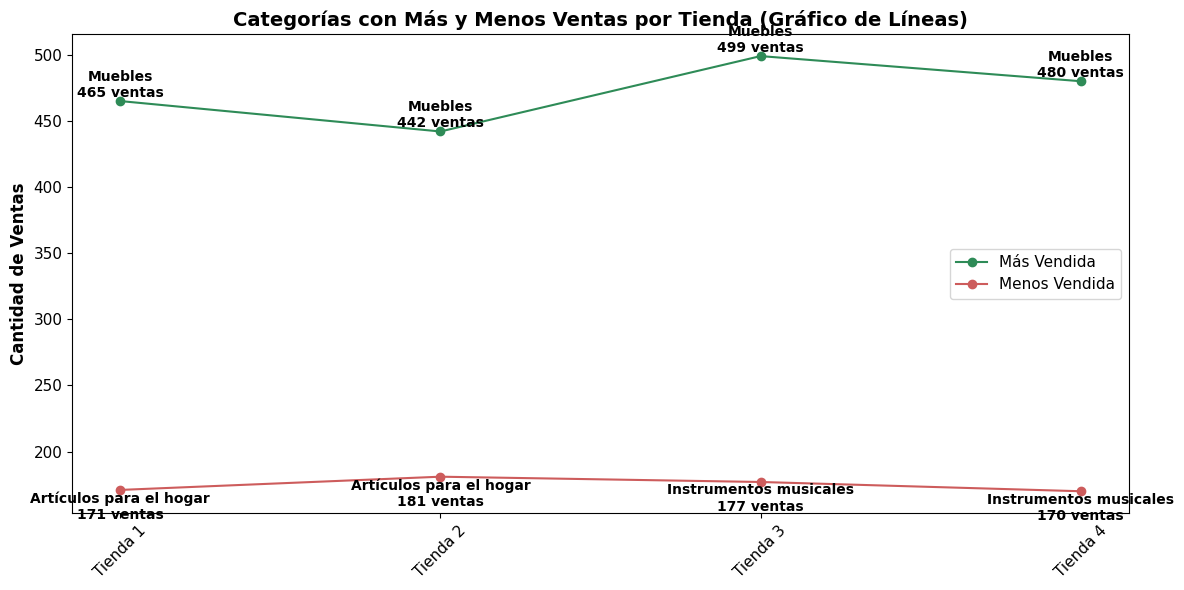

In [ ]:
masVentasCat = {}
menosVentasCat = {}

def categorias_ventas ():
    for nombre, ventas in ventasPorCategoria.items():
      masVentasCat[nombre] = ventas.idxmax()
      menosVentasCat[nombre] = ventas.idxmin()

      print(f"En la {nombre} la categoria con mayour numero de ventas es la categoria de: {masVentasCat[nombre]}")
      print(f"Y la de menor numero de ventas es la categoria de: {menosVentasCat[nombre]}\n")

categorias_ventas()

plt.figure(figsize=(12, 6))
x = range(len(nombres_tiendas))

# Línea para categorías más vendidas
plt.plot(x, valores_max, marker='o', linestyle='-', color='seagreen', label='Más Vendida')
for i, (valor, categoria) in enumerate(zip(valores_max, categorias_max)):
    plt.text(i, valor + 1, f"{categoria}\n{valor} ventas", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Línea para categorías menos vendidas
plt.plot(x, valores_min, marker='o', linestyle='-', color='indianred', label='Menos Vendida')
for i, (valor, categoria) in enumerate(zip(valores_min, categorias_min)):
    plt.text(i, valor - 1, f"{categoria}\n{valor} ventas", ha='center', va='top', fontsize=10, fontweight='bold')

# Configuración general
plt.xticks(x, nombres_tiendas, rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel("Cantidad de Ventas", fontsize=12, fontweight='bold')
plt.title("Categorías con Más y Menos Ventas por Tienda (Gráfico de Líneas)", fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [ ]:
PromCal = {}


for nombre, df in tiendas.items():

   if 'Calificación' in df.columns:

    df['Calificación'] = pd.to_numeric(df['Calificación'])
    Promedio = df['Calificación'].mean() # Calculate the mean
    Redondeo = round(Promedio, 2) # Round the mean
    PromCal [nombre] = float(Redondeo) # Assign the rounded mean to the dictionary

    print (f"La calificación promedio de {nombre} es de: {PromCal[nombre]}")

La calificación promedio de Tienda 1 es de: 3.98
La calificación promedio de Tienda 2 es de: 4.04
La calificación promedio de Tienda 3 es de: 4.05
La calificación promedio de Tienda 4 es de: 4.0


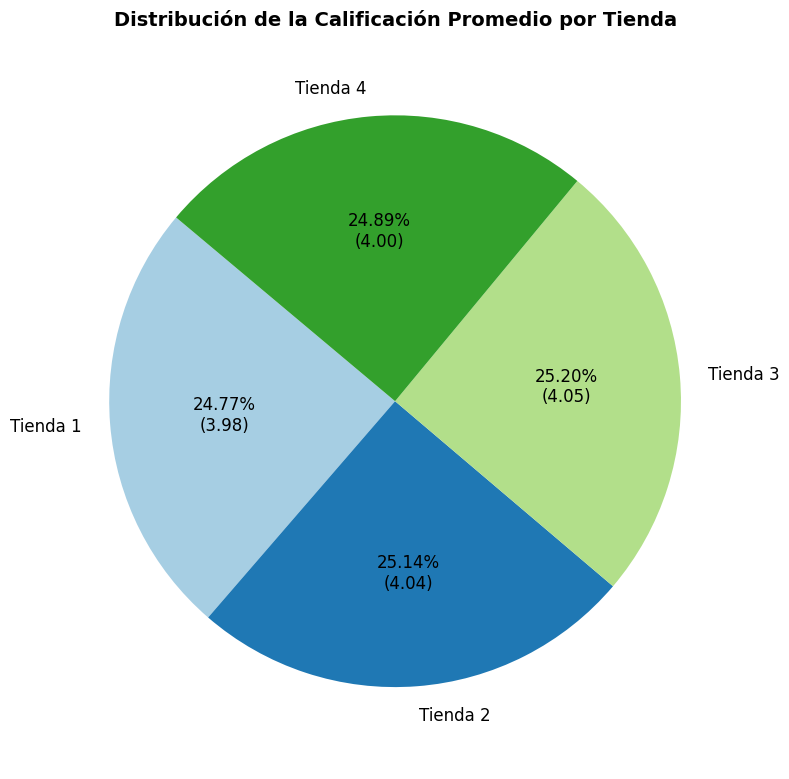

In [ ]:
def pie_calificacion():
    etiquetas = list(tiendas.keys())
    valores = list(PromCal.values())
    total = sum(valores)

    # Función personalizada para mostrar porcentaje y calificación
    def etiqueta_personalizada(pct, all_vals):
        valor = pct * total / 100
        return f'{pct:.2f}%\n({valor:.2f})'

    plt.figure(figsize=(8, 8))
    plt.pie(
        valores,
        labels=etiquetas,
        autopct=lambda pct: etiqueta_personalizada(pct, valores),
        startangle=140,
        colors=plt.cm.Paired.colors,
        textprops={'fontsize': 12}
    )

    plt.title('Distribución de la Calificación Promedio por Tienda', fontsize=14, fontweight='bold')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

pie_calificacion()



# 4. Productos más y menos vendidos

In [ ]:
Productos_mas_vendidos = {}
Productos_menos_vendidos = {}

for nombre_tienda, df in tiendas.items():
    df['Producto'] = df['Producto'].str.strip()
    conteo_productos = df['Producto'].value_counts()

    max_ventas = conteo_productos.max()
    min_ventas = conteo_productos.min()

    productos_mas = conteo_productos[conteo_productos == max_ventas]
    productos_menos = conteo_productos[conteo_productos == min_ventas]

    Productos_mas_vendidos[nombre_tienda] = productos_mas
    Productos_menos_vendidos[nombre_tienda] = productos_menos

    # Mensaje para productos más vendidos
    titulo_mas = "el producto más vendido" if len(productos_mas) == 1 else "los productos más vendidos"
    print(f"En {nombre_tienda}, {titulo_mas} ({max_ventas} ventas) {'es' if len(productos_mas)==1 else 'son'}:\n")
    print(productos_mas.to_string(), "\n")

    # Mensaje para productos menos vendidos
    titulo_menos = "el producto menos vendido" if len(productos_menos) == 1 else "los productos menos vendidos"
    print(f"En {nombre_tienda}, {titulo_menos} ({min_ventas} ventas) {'es' if len(productos_menos)==1 else 'son'}:\n")
    print(productos_menos.to_string(), "\n")


En Tienda 1, los productos más vendidos (60 ventas) son:

Producto
Microondas       60
TV LED UHD 4K    60
Armario          60 

En Tienda 1, los productos menos vendidos (33 ventas) son:

Producto
Auriculares con micrófono    33
Celular ABXY                 33 

En Tienda 2, el producto más vendido (65 ventas) es:

Producto
Iniciando en programación    65 

En Tienda 2, el producto menos vendido (32 ventas) es:

Producto
Juego de mesa    32 

En Tienda 3, el producto más vendido (57 ventas) es:

Producto
Kit de bancas    57 

En Tienda 3, el producto menos vendido (35 ventas) es:

Producto
Bloques de construcción    35 

En Tienda 4, el producto más vendido (62 ventas) es:

Producto
Cama box    62 

En Tienda 4, el producto menos vendido (33 ventas) es:

Producto
Guitarra eléctrica    33 



# 5. Envío promedio por tienda

In [ ]:
costoEnvio = {}

for nombre, envio in tiendas.items():
  if 'Costo de envío' in envio.columns:

    envio['Costo de envío'] = pd.to_numeric(envio['Costo de envío'])
    promev = round(envio['Costo de envío'].mean(), 2)

    costoEnvio[nombre] = float(promev)
    print (f"Los gastos de envio en la {nombre} son de: {costoEnvio[nombre]:,.2f} pesos.")


Los gastos de envio en la Tienda 1 son de: 26,018.61 pesos.
Los gastos de envio en la Tienda 2 son de: 25,216.24 pesos.
Los gastos de envio en la Tienda 3 son de: 24,805.68 pesos.
Los gastos de envio en la Tienda 4 son de: 23,459.46 pesos.


Evaluación de resultados obtenidos

In [1]:
# Datos iniciales de cada tienda
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

facturacion = {
    'Tienda 1': 1150880400.00,
    'Tienda 2': 1116343500.00,
    'Tienda 3': 1098019600.00,
    'Tienda 4': 1038375700.00,
}

calificaciones = {
    'Tienda 1': 3.98,
    'Tienda 2': 4.04,
    'Tienda 3': 4.05,
    'Tienda 4': 4.00,
}

envio_promedio = {
    'Tienda 1': 26018.61,
    'Tienda 2': 25216.24,
    'Tienda 3': 24805.68,
    'Tienda 4': 23459.46,
}

ventas_maximas = {
    'Tienda 1': 60,
    'Tienda 2': 65,
    'Tienda 3': 57,
    'Tienda 4': 62,
}

ventas_minimas = {
    'Tienda 1': 33,
    'Tienda 2': 32,
    'Tienda 3': 35,
    'Tienda 4': 33,
}

def obtener_mejor_y_peor_tienda(diccionario, reverse=True):
    ordenadas = sorted(diccionario.items(), key=lambda x: x[1], reverse=reverse)
    mejor_tienda = ordenadas[0][0]
    mejor_valor = ordenadas[0][1]
    peor_tienda = ordenadas[-1][0]
    peor_valor = ordenadas[-1][1]
    return (mejor_tienda, mejor_valor), (peor_tienda, peor_valor)

# Obtener mejores y peores tiendas por cada criterio
(mejor_facturacion, valor_facturacion), (peor_facturacion, valor_peor_facturacion) = obtener_mejor_y_peor_tienda(facturacion)
(mejor_calificacion, valor_calificacion), (peor_calificacion, valor_peor_calificacion) = obtener_mejor_y_peor_tienda(calificaciones)
(mejor_envio, valor_envio), (peor_envio, valor_peor_envio) = obtener_mejor_y_peor_tienda(envio_promedio, reverse=False)
(mejor_ventas_max, valor_ventas_max), (peor_ventas_max, valor_peor_ventas_max) = obtener_mejor_y_peor_tienda(ventas_maximas)
(mejor_ventas_min, valor_ventas_min), (peor_ventas_min, valor_peor_ventas_min) = obtener_mejor_y_peor_tienda(ventas_minimas, reverse=False)

print("🏅 Mejor y peor tienda en cada aspecto:\n")

print(f"1. Facturación total:")
print(f"   Mejor: {mejor_facturacion} con {valor_facturacion:,.2f} pesos")
print(f"   Peor:  {peor_facturacion} con {valor_peor_facturacion:,.2f} pesos \n")

print(f"2. Calificación promedio:")
print(f"   Mejor: {mejor_calificacion} con {valor_calificacion:.2f} puntos")
print(f"   Peor:  {peor_calificacion} con {valor_peor_calificacion:.2f} puntos\n")

print(f"3. Costo de envío promedio (menor es mejor):")
print(f"   Mejor: {mejor_envio} con {valor_envio:,.2f} pesos")
print(f"   Peor:  {peor_envio} con {valor_peor_envio:,.2f} pesos\n")

print(f"4. Producto más vendido (mayor ventas):")
print(f"   Mejor: {mejor_ventas_max} con {valor_ventas_max} ventas")
print(f"   Peor:  {peor_ventas_max} con {valor_peor_ventas_max} ventas\n")

print(f"5. Producto menos vendido (menor ventas):")
print(f"   Mejor: {mejor_ventas_min} con {valor_ventas_min} ventas")
print(f"   Peor:  {peor_ventas_min} con {valor_peor_ventas_min} ventas\n")

print("⚠️ Razones específicas para considerar la peor tienda en cada aspecto:\n")

print(f"- Facturación baja en {peor_facturacion}:")
print(f"  La facturación es la más baja ( {valor_peor_facturacion:,.2f} pesos), lo que puede indicar menor volumen de ventas o precios bajos.\n")

print(f"- Baja calificación promedio en {peor_calificacion}:")
print(f"  La calificación promedio es la más baja ({valor_peor_calificacion:.2f} puntos), indicando posible insatisfacción de clientes o problemas en servicio/calidad.\n")

print(f"- Alto costo de envío promedio en {peor_envio}:")
print(f"  El costo de envío es el más alto ( {valor_peor_envio:,.2f} pesos), lo que reduce la competitividad y puede disuadir a compradores.\n")

print(f"- Menor número de ventas en producto más vendido en {peor_ventas_max}:")
print(f"  El producto más vendido tiene solo {valor_peor_ventas_max} ventas, lo que puede indicar baja demanda o problemas en la oferta.\n")

print(f"- Mayor número de ventas en producto menos vendido en {peor_ventas_min}:")
print(f"  El producto menos vendido tiene {valor_peor_ventas_min} ventas, un valor alto para un producto que debería rotar poco, lo que puede generar exceso de inventario o pérdidas.\n")

# Cálculo para decidir la peor tienda en general:
# Asignamos puntajes a cada tienda: 1 punto por ser peor en un aspecto
puntos_peores = {tienda: 0 for tienda in tiendas}

# Sumar puntos según tiendas peores en cada aspecto
puntos_peores[peor_facturacion] += 1
puntos_peores[peor_calificacion] += 1
puntos_peores[peor_envio] += 1
puntos_peores[peor_ventas_max] += 1
puntos_peores[peor_ventas_min] += 1

# Identificar peor tienda general
tienda_peor_general = max(puntos_peores, key=puntos_peores.get)
puntaje_max = puntos_peores[tienda_peor_general]

print("============================================")
print(f"🏆 Peor tienda en general: {tienda_peor_general} con {puntaje_max} aspectos negativos.")
print("Razones para considerar vender:")

if puntaje_max == 1:
    print(f"- Esta tienda es la peor en un solo aspecto, pero es importante revisar ese punto específico.")
else:
    print(f"- Esta tienda es la peor en múltiples aspectos, lo que indica que presenta problemas importantes en diferentes áreas clave.")

print(f"\nDetalles del desempeño negativo de {tienda_peor_general}:")
for aspecto, peor_tienda in zip(
    ["Facturación", "Calificación", "Costo de envío", "Ventas máximo producto", "Ventas mínimo producto"],
    [peor_facturacion, peor_calificacion, peor_envio, peor_ventas_max, peor_ventas_min]
):
    if peor_tienda == tienda_peor_general:
        print(f"- Peor en {aspecto}")

print(f"\nSe recomienda considerar vender la {tienda_peor_general} debido a su bajo rendimiento general.")



🏅 Mejor y peor tienda en cada aspecto:

1. Facturación total:
   Mejor: Tienda 1 con 1,150,880,400.00 pesos
   Peor:  Tienda 4 con 1,038,375,700.00 pesos 

2. Calificación promedio:
   Mejor: Tienda 3 con 4.05 puntos
   Peor:  Tienda 1 con 3.98 puntos

3. Costo de envío promedio (menor es mejor):
   Mejor: Tienda 4 con 23,459.46 pesos
   Peor:  Tienda 1 con 26,018.61 pesos

4. Producto más vendido (mayor ventas):
   Mejor: Tienda 2 con 65 ventas
   Peor:  Tienda 3 con 57 ventas

5. Producto menos vendido (menor ventas):
   Mejor: Tienda 2 con 32 ventas
   Peor:  Tienda 3 con 35 ventas

⚠️ Razones específicas para considerar la peor tienda en cada aspecto:

- Facturación baja en Tienda 4:
  La facturación es la más baja ( 1,038,375,700.00 pesos), lo que puede indicar menor volumen de ventas o precios bajos.

- Baja calificación promedio en Tienda 1:
  La calificación promedio es la más baja (3.98 puntos), indicando posible insatisfacción de clientes o problemas en servicio/calidad.

- A